In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D, MaxPooling2D
from keras.layers import LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam, RMSprop, SGD

from scipy import misc
import imageio
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
face = imageio.imread("emojies/face-palm_1f926.png")

In [3]:
image_shape = face.shape
print("shape is", image_shape)

shape is (72, 72, 4)


In [4]:
def discriminator_model(input_shape):
    depth = 64
    dropout = 0.4

    model = Sequential(name="discriminator")
    model.add(Conv2D(depth*1, 5, strides=2, input_shape=input_shape, padding='same', name='hello'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))

    model.add(Conv2D(depth*2, 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))

    model.add(Conv2D(depth*4, 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))

    model.add(Conv2D(depth*8, 5, strides=1, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    return model

In [5]:
def generator_model():
    
    dropout = 0.4
    depth = 64+64+64+64
    dim = 7
    
    model = Sequential()
    # In: 100
    # Out: dim x dim x depth
    model.add(Dense(dim*dim*depth, input_dim=100))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))
    model.add(Reshape((dim, dim, depth)))
    model.add(Dropout(dropout))

    # In: dim x dim x depth
    # Out: 2*dim x 2*dim x depth/2
    model.add(UpSampling2D())
    model.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))

    model.add(UpSampling2D())
    model.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))

    model.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))

    # Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
    model.add(Conv2DTranspose(1, 5, padding='same'))
    model.add(Activation('sigmoid'))
    return model

In [6]:
discriminator = discriminator_model(image_shape)
discriminator.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hello (Conv2D)               (None, 36, 36, 64)        6464      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 128)       204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)  

In [7]:
generator = generator_model()
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_1 (Batch (None, 12544)             50176     
_________________________________________________________________
activation_2 (Activation)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 128)       819328    
__________

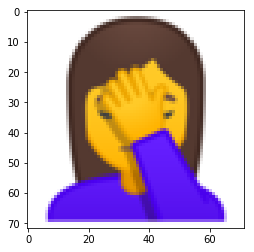

In [14]:
plt.imshow(face)
plt.show()

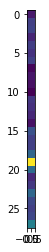

In [22]:
prediction = generator.predict_proba(np.random.randint(low=0,high=100,size=(2,100)))
image = prediction[0] * 255
plt.imshow(image[0])
plt.show()

In [67]:
model = Sequential(name="my_model_1")
model.add(Dense(72*72*4,input_dim=3))
model.add(BatchNormalization(momentum=0.9))
model.add(Activation('relu'))
model.add(Reshape((72,72,4)))

sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20736)             82944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 20736)             82944     
_________________________________________________________________
reshape_9 (Reshape)          (None, 72, 72, 4)         0         
_________________________________________________________________
activation_9 (Activation)    (None, 72, 72, 4)         0         
Total params: 165,888
Trainable params: 124,416
Non-trainable params: 41,472
_________________________________________________________________


In [68]:
x = np.array([[1,2,3],[2,3,4]])
prediction = model.predict(x)
prediction.shape

(2, 72, 72, 4)

(72, 72, 4)


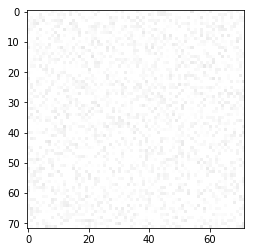

(72, 72, 4)


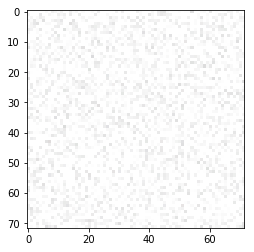

In [69]:
for p in prediction:
    print(p.shape)
    plt.imshow(p)
    plt.show()

In [125]:
# X = np.array([[0,0],[0,1],[1,0],[1,1]])
# y = np.array([[0],[1],[1],[0]])
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[0],[0],[1]])

model = Sequential()
model.add(Dense(8, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

model.fit(X, y, batch_size=1, epochs=1000)
print(model.predict_proba(X))

Epoch 1/1000
4/4 [==============================] - 0s 75ms/step - loss: 0.7668
Epoch 2/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.7202
Epoch 3/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6838
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6501
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6218
Epoch 6/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.5960
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5702
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5494
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5276
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5067
Epoch 11/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4867
Epoch 12/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.4716
Epoch 13/1000
4/4 [=============================

4/4 [==============================] - 0s 1ms/step - loss: 0.0425
Epoch 104/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 105/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 106/1000
4/4 [==============================] - 0s 923us/step - loss: 0.0404
Epoch 107/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0399
Epoch 108/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 109/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 110/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0381
Epoch 111/1000
4/4 [==============================] - 0s 972us/step - loss: 0.0375
Epoch 112/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0369
Epoch 113/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0365
Epoch 114/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 115/1000
4/4 [===================

4/4 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 205/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 206/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 207/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 208/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 209/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 210/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 211/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 212/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 213/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 214/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 215/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 216/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 305/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 306/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 307/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 308/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 309/1000
4/4 [==============================] - 0s 880us/step - loss: 0.0074
Epoch 310/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 311/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 312/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 313/1000
4/4 [==============================] - 0s 988us/step - loss: 0.0072
Epoch 314/1000
4/4 [==============================] - 0s 817us/step - loss: 0.0072
Epoch 315/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 316/1000
4/4 [=================

4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 405/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 406/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 407/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 408/1000
4/4 [==============================] - 0s 973us/step - loss: 0.0049
Epoch 409/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 410/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 411/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 412/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 413/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 414/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 415/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 416/1000
4/4 [=====================

4/4 [==============================] - 0s 788us/step - loss: 0.0036
Epoch 505/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 506/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 507/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 508/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 509/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 510/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 511/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 512/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 513/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 514/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 515/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 516/1000
4/4 [=====================

4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 606/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 607/1000
4/4 [==============================] - 0s 696us/step - loss: 0.0028
Epoch 608/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 610/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 611/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0028
Epoch 612/1000
4/4 [==============================] - 0s 888us/step - loss: 0.0028
Epoch 613/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 614/1000
4/4 [==============================] - 0s 971us/step - loss: 0.0028
Epoch 615/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 616/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 617/1000
4/4 [=================

4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 707/1000
4/4 [==============================] - 0s 880us/step - loss: 0.0023
Epoch 708/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 709/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 710/1000
4/4 [==============================] - 0s 796us/step - loss: 0.0023
Epoch 711/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 712/1000
4/4 [==============================] - 0s 909us/step - loss: 0.0023
Epoch 713/1000
4/4 [==============================] - 0s 831us/step - loss: 0.0023
Epoch 714/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 715/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 716/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 717/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 718/1000
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 807/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 808/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 809/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 810/1000
4/4 [==============================] - ETA: 0s - loss: 0.001 - 0s 2ms/step - loss: 0.0019
Epoch 811/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 812/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 813/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 814/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 815/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 816/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 817/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 818/1000
4/4 

4/4 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 907/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 908/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 909/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 910/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 911/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 912/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 913/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 914/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 915/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 916/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 917/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 918/1000
4/4 [=======================

In [132]:
print(model.predict_proba(X))
prediction = model.predict_proba(X)
print(prediction)
print(np.rint(prediction))

[[4.0391019e-06]
 [1.8022783e-03]
 [1.3869123e-03]
 [9.9739599e-01]]
[[4.0391019e-06]
 [1.8022783e-03]
 [1.3869123e-03]
 [9.9739599e-01]]
[[0.]
 [0.]
 [0.]
 [1.]]


In [133]:
model.save('my_model.h5')
json_string = model.to_json()
del model

In [131]:
model = keras.models.load_model('my_model.h5')

In [136]:
print(json_string)
model = keras.models.model_from_json(json_string)

{"class_name": "Sequential", "config": {"name": "sequential_16", "layers": [{"class_name": "Dense", "config": {"name": "dense_22", "trainable": true, "batch_input_shape": [null, 2], "dtype": "float32", "units": 8, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Activation", "config": {"name": "activation_23", "trainable": true, "activation": "tanh"}}, {"class_name": "Dense", "config": {"name": "dense_23", "trainable": true, "units": 1, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"cla

In [137]:
model.save_weights('my_model_weights.h5')